In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
import os
code_path = "/content/gdrive/MyDrive/CSE512-hw3/"
os.chdir(code_path)

In [4]:
#common packages we basically always need
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as sio
from time import time


{'__header__': b'MATLAB 5.0 MAT-file Platform: posix, Created on: Wed Oct 18 19:00:09 2017', '__version__': '1.0', '__globals__': [], 'testX': array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), 'testY': array([[7, 2, 1, ..., 4, 5, 6]], dtype=uint8), 'trainY': array([[5, 0, 4, ..., 5, 6, 8]], dtype=uint8), 'trainX': array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)}


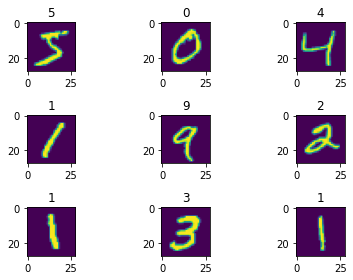

In [5]:
#load the MNIST dataset with binary pixel values
data = sio.loadmat('mnist.mat')
print(data)



Xtrain, Xtest = data['trainX'].astype(float), data['testX'].astype(float)
ytrain, ytest = data['trainY'][0], data['testY'][0]

#pull and plot some samples
for k in range(9):
    plot_data = Xtrain[k,:]
    plot_data = np.reshape(plot_data,(28,28))
    plot_label = ytrain[k]
    plt.subplot(3,3,k+1)
    plt.imshow(plot_data)
    plt.title(plot_label)
plt.tight_layout()

In [6]:
#load the MNIST dataset with binary pixel values
data = sio.loadmat('mnist.mat')
print(data)


select_train = np.logical_or(np.equal(ytrain,4),np.equal(ytrain,9))
select_test = np.logical_or(np.equal(ytest,4),np.equal(ytest,9))
Xtrain = Xtrain[select_train,:]
Xtest = Xtest[select_test,:]
ytrain = np.sign(np.equal(ytrain[select_train],4.)-.5)
ytest = np.sign(np.equal(ytest[select_test],4.)-.5)


m,n = Xtrain.shape
mt = Xtest.shape[0]

{'__header__': b'MATLAB 5.0 MAT-file Platform: posix, Created on: Wed Oct 18 19:00:09 2017', '__version__': '1.0', '__globals__': [], 'testX': array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), 'testY': array([[7, 2, 1, ..., 4, 5, 6]], dtype=uint8), 'trainY': array([[5, 0, 4, ..., 5, 6, 8]], dtype=uint8), 'trainX': array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)}


In [49]:
#Question(b)
def sigmoid(x):
    return 1.0 / (1.0 + np.exp(-x))

def getLossFunction(theta):
    X = 0
    for i in range(m):
      X = X + np.log(sigmoid(ytrain[i]*np.dot(Xtrain[i].T, theta)))
    X = X * (-1/m)
    return X

def getGradient(theta):
    m, n = Xtrain.shape
    X = Xtrain
    theta = theta.reshape((n, 1))
    y = np.copy(ytrain)
    y[y==-1] = 0
    y = y.reshape((m, 1))
    h = sigmoid(X.dot(theta))
    res = ((1 / m) * X.T.dot(h - y))
    res = res.reshape(-1)
    # print(res.shape)
    return res


# TEST SCRIPT. DO NOT MODIFY!
theta = np.linspace(-.1,.1,n)
print('Check number is', getLossFunction(theta),np.sum(getGradient(theta)))


Check number is 45.19215648734918 12343.176947604472


In [52]:
theta = np.zeros(n)

#return accuracy given theta
def accy(theta):
  y_preTrain = np.zeros(m)

  for i in range(m):
    y_preTrain[i] = np.sign(np.dot(Xtrain[i].T, theta))
  y_preTest = np.zeros(mt)
  accyTrain = np.sum(np.equal(y_preTrain, ytrain))/m
  
  for i in range(mt):
    y_preTest[i] = np.sign(np.dot(Xtest[i].T, theta))
  accyTest = np.sum(np.equal(y_preTest, ytest))/mt

  return  accyTrain, accyTest

print(accy(theta))

(0.0, 0.0)


training loss:


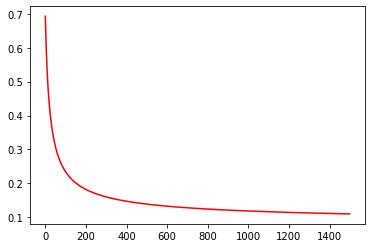

training misclassification rate:


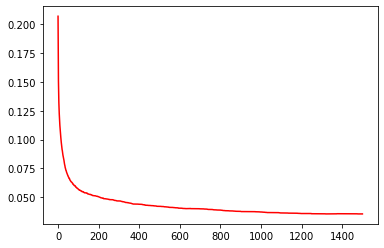

test misclassification rate:


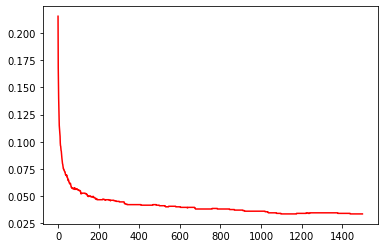

accuracy of training: 0.9644644220167925
accuracy of testing: 0.9663485685585133


In [48]:
lr = 1e-6
iteration = 1500
trainLoss = []
misTrain = []
misTest = []

for i in range(iteration):

    trainLoss.append(getLossFunction(theta))
    gradient = getGradient(theta)
    theta -= lr * gradient
    accyTrain, accyTest = accy(theta)

    misTrain.append(1 - accyTrain)
    misTest.append(1 - accyTest)

print('training loss:')
plt.plot(range(iteration), trainLoss, c = 'red')
plt.show()

print('training misclassification rate:')
plt.plot(range(iteration), misTrain, c = 'red')
plt.show()

print('test misclassification rate:')
plt.plot(range(iteration), misTest, c = 'red')
plt.show()

accyTrain, accyTest = accy(theta)

print("accuracy of training:", accyTrain)
print("accuracy of testing:", accyTest)

In [66]:
#Question(c) 
def getStochGradient(theta, minibatch):
    thetaC = np.zeros(n)

    for i in minibatch:
        thetaC = thetaC + (sigmoid(ytrain[i] * np.dot(Xtrain[i].T, theta)) - 1) * ytrain[i] * Xtrain[i]
    
    thetaC = thetaC / len(minibatch)
    return thetaC
    
# TEST SCRIPT. DO NOT MODIFY!
theta = np.linspace(-.1,.1,n)
print('Check number is',np.sum(getStochGradient(theta,[1,4,6,2])))


Check number is 5803.5


In [56]:
#you can use time() to measure runtime of things.
#sample runtime code: 

#Question(d)

# def do_stuff_takes_nseconds(n):
#     wait(n)
# start = time()
# do_stuff_takes_nseconds(n)
# print(time()-start, ' seconds to run code')
time_sgd = []
acc_train_sgd = []
acc_test_sgd = []
loss_sgd = []
lr = 1e-6
batch_size = 50
sample = 0
theta = np.zeros(n)
start = time()
for iteration in range(50000):
    if sample+50>=m:
        batch = range(sample, m)
        sample = 0
    else:
        batch = range(sample, sample+50)
        sample += 50
    gradient = getStochGradient(theta, batch)
    theta -= lr * gradient
    if iteration % 100 == 0:
        time_sgd.append(time()-start)
        acc_train, acc_test = accy(theta)
        acc_train_sgd.append(acc_train)
        acc_test_sgd.append(acc_test)
        loss_sgd.append(getLossFunction(theta))

In [58]:
time_gd = []
acc_train_gd = []
acc_test_gd = []
loss_gd = []
lr = 1e-6
theta = np.zeros(n)
start = time()
for iteration in range(5):
    gradient = getGradient(theta)
    theta -= lr * gradient
    if iteration % 10 == 0:
        time_gd.append(time()-start)
        acc_train, acc_test = accy(theta)
        acc_train_gd.append(acc_train)
        acc_test_gd.append(acc_test)
        loss_gd.append(getLossFunction(theta))

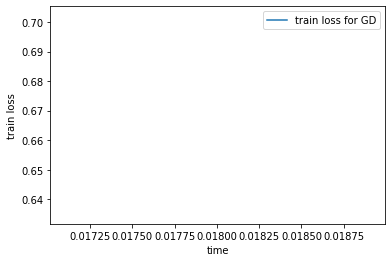

In [67]:
#plt.plot(time_sgd, loss_sgd, label = "train loss for SGD")
plt.plot(time_gd, loss_gd, label = "train loss for GD")
plt.xlabel("time")
plt.ylabel("train loss")
plt.legend()
plt.show()

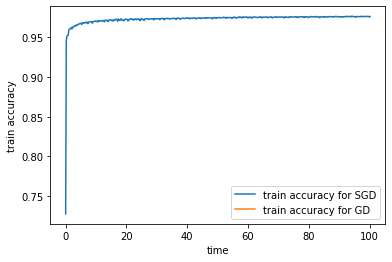

In [63]:
plt.plot(time_sgd, acc_train_sgd, label = "train accuracy for SGD")
plt.plot(time_gd, acc_train_gd, label = "train accuracy for GD")
plt.xlabel("time")
plt.ylabel("train accuracy")
plt.legend()
plt.show()

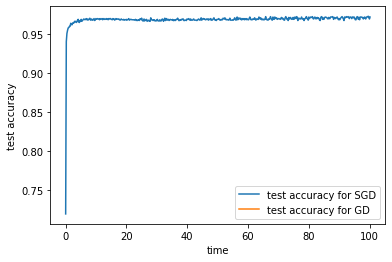

In [64]:
plt.plot(time_sgd, acc_test_sgd, label = "test accuracy for SGD")
plt.plot(time_gd, acc_test_gd, label = "test accuracy for GD")
plt.xlabel("time")
plt.ylabel("test accuracy")
plt.legend()
plt.show()

In [65]:
print("Train accuracy for SGD:", acc_train_sgd[-1])
print("Test accuracy for SGD:", acc_test_sgd[-1])
print("Train accuracy for GD:", acc_train_gd[-1])
print("Test accuracy for GD:", acc_test_gd[-1])

Train accuracy for SGD: 0.976083453481469
Test accuracy for SGD: 0.9723756906077348
Train accuracy for GD: 0.7931473157493003
Test accuracy for GD: 0.7845303867403315
